<h4 style="font-variant-caps: small-caps;font-size:35pt;">Databricks-ML-professional-S03a-Batch</h4>

<div style='background-color:black;border-radius:5px;border-top:1px solid'></div>
<br/>
<p>This Notebook adds information related to the following requirements:</p><br/>
<b>Batch:</b>
<ul>
<li>Describe batch deployment as the appropriate use case for the vast majority of deployment use cases</li>
<li>Identify how batch deployment computes predictions and saves them somewhere for later use</li>
<li>Identify live serving benefits of querying precomputed batch predictions</li>
<li>Identify less performant data storage as a solution for other use cases</li>
<li>Load registered models with load_model</li>
<li>Deploy a single-node model in parallel using spark_udf</li>
<li>Identify z-ordering as a solution for reducing the amount of time to read predictions from a table</li>
<li>Identify partitioning on a common column to speed up querying</li>
<li>Describe the practical benefits of using the score_batch operation</li>
</ul>
<br/>
<p><b>Download this notebook at format ipynb <a href="Databricks-ML-professional-S03a-Batch.ipynb">here</a>.</b></p>
<br/>
<div style='background-color:black;border-radius:5px;border-top:1px solid'></div>

<a id="batch"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">1. Describe batch deployment as the appropriate use case for the vast majority of
deployment use cases</span></div>
<ul>
<li>For use cases where latency is not a restringent requirement <i>(model doesn't have any requirements in term of speed to generate predictions)</i></li>
<li>Data or processing tasks are collected and processed in fixed-size batches</li>
<li>The data is collected over a period, and the processing occurs on the entire batch</li>
<li>Batch processing typically has higher latency because it waits for a set amount of data or a specific time interval before processing.</li>
<li>Can leverage databases and object storage for historical data</li>
<li>80-90% of use cases are in batch deployment</li>
<li><span style="text-decoration:underline">Example</span>: ETL (Extract, Transform, Load) jobs, nightly data processing, and batch analytics are common use cases for batch deployment.</li></ul>
<div style="display:block;text-align:center"><img width="500px" src="https://i.ibb.co/rxzz2vS/databricks-ml-pro-latency.png"/>

<a id="batchsaves"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">2. Identify how batch deployment computes predictions and saves them somewhere
for later use</span></div>
<p>Refers to the process of making predictions in a batch deployment scenario and storing the results for future reference or utilization. Let's break down the key components:</p>
<ol>
<li><b>Batch deployment</b>: In the context of machine learning or data processing, batch deployment refers to a mode of operation where predictions or computations are performed on a set of data collected over a specific period or based on a predefined batch size.</li>
<li><b>Computes Predictions</b>: This indicates that the system is generating predictions or results based on the input data. In machine learning, this could involve running a trained model on a batch of input data to produce predictions.</li>
<li><b>Save predictions Somewhere</b>: After computing predictions, the results are not immediately discarded. Instead, they are stored or saved in a designated location. This storage could be in databases, files, or any other suitable data storage system.</li>
<li><b>Later use</b>: The predictions are saved with the intention of using them at a later time. This could be for various purposes such as analysis, reporting, or serving the predictions to end-users when needed.</li>
</ol>
<p>In practical terms, the process might involve running a batch job that takes a set of input data, applies a trained model to make predictions, and then stores these predictions in a database, file system, or another storage solution. This approach is common in scenarios where real-time processing is not critical, and predictions can be made on a periodic basis.</p>
<p>For example, in a <b>recommendation system</b>, batch deployment might involve processing user interactions over a day and generating personalized recommendations overnight. The computed recommendations would then be saved for use the next day when users interact with the system.</p>

<a id="batchprecomputed"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">3. Identify live serving benefits of querying precomputed batch predictions</span></div>
<ol>
<li><b>Reduced Latency</b>: Precomputing predictions in batch mode allows the system to process and store results ahead of time. This can lead to lower latency during live serving since the predictions are readily available and don't require real-time computation.</li>
<li><b>Scalability</b>: Batch processing can be more efficient for large-scale computations. By precomputing predictions in batches, the system can scale more easily to handle varying workloads during live serving.</li>
<li><b>Resource efficiency</b>: Computing predictions in batch mode can be resource-efficient, especially for complex models or large datasets. It allows the system to optimize resource utilization during non-peak hours.</li>
<li><b>Consistency</b>: Precomputed batch predictions can offer consistency in results, as they are generated using the same model and data. This is in contrast to real-time predictions, which might be influenced by changes in the model or input data at the moment of serving.</li>
<li><b>Offline analysis</b>: Having precomputed predictions enables offline analysis of the results, allowing organizations to gain insights, perform audits, and conduct evaluations without affecting live serving.</li>
</ol>

<a id="otherusecases"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">4. Identify less performant data storage as a solution for other use cases</span></div>
<p>In the context of batch deployment for machine learning models, where predictions are generated in bulk, it's common to save these predictions for later use.</p><p>For live serving, high-performance databases are often preferred for quick retrieval. However, in certain scenarios like populating emails, where rapid access may not be crucial, less performant data storage options, such as a blob store, can be identified as suitable solutions.</p><p>These storage solutions may not offer the highest performance but are chosen strategically based on the specific needs of use cases like email population, balancing considerations of performance and efficiency.</p>

<a id="loadregisteredmodels"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">5. Load registered models with load_model</span></div>
<p>Let's see two examples to illustrate this requirement:</p>
<ul><li>One model trained using <span style="color:orangered">scikit-learn</span> library</li>
<li>One model trained using <span style="color:orangered">MLlib</span> library</li></ul>
<p>Then both models will be loaded using <code>mlflow.pyfunc.load_model</code> function and used the same way for prediction on test set.</p>

<b>Load some libraries</b>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#
from pyspark.sql.functions import *
#
import mlflow
import logging
#
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
#
from databricks import feature_store

In [ ]:
logging.getLogger("mlflow").setLevel(logging.FATAL)

<p><b>Load data into a pandas dataframe</b> <i>(for the sake of simplicity, let's only keep numerical columns)</i>:</p>

In [ ]:
diamonds_df = sns.load_dataset('diamonds').drop(columns=['cut', 'clarity', 'color'], axis=1)
diamonds_df.sample(3)

,carat,depth,table,price,x,y,z
26985,2.01,60.1,61.0,17068,8.14,8.06,4.87
29197,0.33,59.0,61.0,694,4.49,4.56,2.67
32340,0.30,62.1,56.0,789,4.29,4.31,2.67


<p><b>Let's drop duplicates and separate into train set (67%) and test set (33%)</b>:</p>

In [ ]:
diamonds_sdf = spark.createDataFrame(diamonds_df).dropDuplicates()
#
# Spark Dataframes
test_sdf = diamonds_sdf.orderBy(rand()).limit(int(33*diamonds_sdf.count()/100))
train_sdf = diamonds_sdf.subtract(test_sdf)
#
# Pandas Dataframes
test_df = test_sdf.toPandas()
train_df = train_sdf.toPandas()
#
print(f"Number of rows test set: {test_sdf.count()}")
print(f"Number of rows train set: {train_sdf.count()}")
print(f"Sum of count rows of train and test set: {train_sdf.count() + test_sdf.count()}")
print(f"Total number of rows of initial dataframe: {diamonds_sdf.count()}")

Number of rows test set: 17731
Number of rows train set: 36001
Sum of count rows of train and test set: 53732
Total number of rows of initial dataframe: 53732


<p><b><span style="color:orangered">Scikit-learn</span> library:</b></p>
<ul>
<li>Train model on train set</li>
<li>Log model to MLflow</li>
<li>Register model</li>
<li>Load model using <code>mlflow.pyfunc.load_model</code></li>
<li>Predict test set using loaded model</li>
</ul>

In [ ]:
# Prepare features and target dataframes
X = train_df.drop('price', axis=1)
y = train_df['price']
#
# train model (is automatically logged to mlflow)
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X, y)
#
# get latest run_id programmaticaly
latest_run_id = mlflow.search_runs().sort_values(by="end_time", ascending=False).head(1)['run_id'][0]
#
# uri to latest run (by default, artifact_path is 'model')
uri_scikit_learn = f"runs:/{latest_run_id}/model"
#
# register latest logged model
mlflow.register_model(uri_scikit_learn, name="scikit-learn_model")
#
# load latest registered model
scikit_learn_model = mlflow.pyfunc.load_model(uri_scikit_learn)
#
# prediction of test set using loaded model
pd.DataFrame(scikit_learn_model.predict(test_df.drop('price', axis=1)), columns=['predictions']).head(5)

Registered model 'scikit-learn_model' already exists. Creating a new version of this model...
Created version '7' of model 'scikit-learn_model'.


,predictions
0,6771.932454
1,10611.573560
2,741.122107
3,1805.671346
4,1587.993408


<p><b><span style="color:orangered">MLlib</span> library:</b> There is an additional step which is to convert input to vector using <code>VectorAssembler</code>. Thus, we need a pipeline and we will log to MLflow the fitted pipeline.</p>
<ul>
<li>Define vector assembler</li>
<li>Define Pipeline</li>
<li>Train pipeline on train set</li>
<li>Log pipeline as a model to MLflow</li>
<li>Register model</li>
<li>Load model using <code>mlflow.pyfunc.load_model</code></li>
<li>Predict test set using loaded model</li>
</ul>

In [ ]:
# set vector assembler parameters
assembler_inputs = [c for c in train_sdf.columns if c not in ['price']]
vec_assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
#
# instantiate model
mllib_rfr = LinearRegression(featuresCol="features", labelCol='price')
#
# define pipeline stages
stages = [vec_assembler, mllib_rfr]
#
# set pipeline
pipeline = Pipeline(stages=stages)
#
# fit pipeline to train set
model_mllib = pipeline.fit(train_sdf)
#
# get latest run_id programmaticaly
latest_run_id = mlflow.search_runs().sort_values(by="end_time", ascending=False).head(1)['run_id'][0]
#
# uri to latest run (by default, artifact_path is 'model')
uri_mllib = f"runs:/{latest_run_id}/model"
#
# register latest logged model
mlflow.register_model(uri_mllib, name="mllib_model")
#
# load latest registered model
mllib_model = mlflow.pyfunc.load_model(uri_mllib)
#
# Here predictions can be done using same input as for model trained using scikit learn library
pd.DataFrame(mllib_model.predict(test_df.drop('price', axis=1)), columns=['predictions']).head(5)

Registered model 'mllib_model' already exists. Creating a new version of this model...
Created version '4' of model 'mllib_model'.


,predictions
0,6711.408932
1,9540.179628
2,647.270082
3,2388.329445
4,1695.716464


<a id="deploysinglenode"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">6. Deploy a single-node model in parallel using spark_udf</span></div>
<p>With the model trained using scikit-learn library, it is possible to load it and affect it to a Spark UDF function to make predictions:</p>

In [ ]:
# load model into a spark udf
predict_scikit_learn = mlflow.pyfunc.spark_udf(spark, uri_scikit_learn)
#
# make predictions on the spark test dataframe
display(test_sdf.withColumn("prediction", predict_scikit_learn(*[c for c in test_sdf.columns if c not in ['price']])).select("price", "prediction").limit(5))

price,prediction
4580,6771.9324540939115
8408,10611.573559702078
1103,741.122106786866
1332,1805.6713457303665
1293,1587.9934075468402


<a id="zorder"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">7. Identify z-ordering as a solution for reducing the amount of time to read predictions
from a table</span></div>
<p><b>Z-Ordering</b>: colocates related information in the same set of files</p>
<p><b>Z-Ordering</b> is a form of multi-dimensional clustering that colocates related information in the same set of files. It reduces the amount of data that needs to be read. <a href="https://docs.databricks.com/delta/optimizations/file-mgmt.html#z-ordering-multi-dimensional-clustering" target="_blank">See more here</a>.</p>
<p>Here after is an example of use of Z-ordering.</p>
<p>Let's first write a dataframe as a Delta table:</p>

In [ ]:
(train_sdf.write
          .format("delta")
          .mode("overwrite")
          .option("overwriteSchema", "true")
          .saveAsTable("train_set_diamonds"))

<p>Let's get table location:</p>

In [ ]:
display(spark.sql("describe table extended train_set_diamonds").filter("col_name in ('Location')"))

col_name,data_type,comment
Location,dbfs:/user/hive/warehouse/train_set_diamonds,


<p>Let's <b>Z-order</b> table by feature <code>carat</code>:</p>

In [ ]:
delta_partitioned_path = "dbfs:/user/hive/warehouse/train_set_diamonds"
#
spark.sql(f"OPTIMIZE delta.`{delta_partitioned_path}` ZORDER BY (carat)");

<a id="partitioning"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">8. Identify partitioning on a common column to speed up querying</span></div>
<p><b>Partitioning</b>: stores data associated with different categorical values in different directories</p>
<p><b>Partition</b> will create as many folders as there are distinct values in the specified column for partitioning. Thus, column with high cardinality are not recommanded as partition key.</p><p>Here after is an example of use of Partitioning.</p>
<p>Let's first reload the original dataframe and save it as a managed Delta table:</p>

In [ ]:
(spark.createDataFrame(sns.load_dataset('diamonds')).write
                                                    .format("delta")
                                                    .mode("overwrite")
                                                    .option("overwriteSchema", "true")
                                                    .saveAsTable("diamonds_df_not_partitioned"))

<p>Let's have a look at the content of the delta table folder. We see that there are four parquet files an a folder <code>_delta_log</code>:</p>

In [ ]:
display(spark.sql("describe table extended diamonds_df_not_partitioned").filter("col_name in ('Location')"))

col_name,data_type,comment
Location,dbfs:/user/hive/warehouse/diamonds_df_not_partitioned,


In [ ]:
for file in dbutils.fs.ls("dbfs:/user/hive/warehouse/diamonds_df_not_partitioned"):
    print(file.path)

dbfs:/user/hive/warehouse/diamonds_df_not_partitioned/_delta_log/
dbfs:/user/hive/warehouse/diamonds_df_not_partitioned/part-00000-ae36b44e-0c7d-4c9f-9a6b-303df7a6b41c-c000.snappy.parquet
dbfs:/user/hive/warehouse/diamonds_df_not_partitioned/part-00001-88c54dec-c999-415e-a6b7-e18f6fcf912c-c000.snappy.parquet
dbfs:/user/hive/warehouse/diamonds_df_not_partitioned/part-00002-05d4b875-93c6-49c3-a176-e25ac6c39cab-c000.snappy.parquet
dbfs:/user/hive/warehouse/diamonds_df_not_partitioned/part-00003-739559b9-0ff4-443f-a6ef-502f1733bae4-c000.snappy.parquet


<p>We can identify the feature <code>cut</code> as a good candidate to be the partition key:</p>

In [ ]:
display(spark.table("diamonds_df_not_partitioned").groupBy("cut").count().orderBy(desc('count')))

cut,count
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<p>Let's partition using <code>cut</code> as partition key:</p>

In [ ]:
(spark.table("diamonds_df_not_partitioned")
      .write.partitionBy("cut")
      .format("delta")
      .mode("overwrite")
      .option("overwriteSchema", "true")
      .saveAsTable("diamonds_df_partitioned"))

<p>Now let's have a look at the content of the partitioned table. We see there as many folders as there are distinct values in column <code>cut</code>. This will speed-up requests.</p>

In [ ]:
for file in dbutils.fs.ls("dbfs:/user/hive/warehouse/diamonds_df_partitioned"):
    print(file.path)

dbfs:/user/hive/warehouse/diamonds_df_partitioned/_delta_log/
dbfs:/user/hive/warehouse/diamonds_df_partitioned/cut=Fair/
dbfs:/user/hive/warehouse/diamonds_df_partitioned/cut=Good/
dbfs:/user/hive/warehouse/diamonds_df_partitioned/cut=Ideal/
dbfs:/user/hive/warehouse/diamonds_df_partitioned/cut=Premium/
dbfs:/user/hive/warehouse/diamonds_df_partitioned/cut=Very Good/


<a id="scorebatch"></a>
<div style='background-color:rgba(30, 144, 255, 0.1);border-radius:5px;padding:2px;'>
<span style="font-variant-caps: small-caps;font-weight:700">9. Describe the practical benefits of using the score_batch operation</span></div>
<p><code>score_batch</code> let's make predictions easily on a large amount of data at a time using features coming from <b>feature store</b>.</p>
<p>Let's have a look at an example to illustrate this requirement:</p>
<ol>
<li><b>Load dataset</b>: The dataset used for the example is <code>diamonds</code> dataset from <b>Seaborn</b> library</li>
<li><b>Create Feature table in Feature Store</b></li>
<li><b>Push preprocessed features to Feature Store</b></li>
<li><b>Create train and test sets</b></li>
<li><b>Prepare and train models</b></li>
<li><b>Log models to associate them to features in Features Store</b></li>
<li><b>Score models on test set using <code>score_batch</code></b></li>
<li><b>Case of new data</b></li>
</ol>

<p><b>1. Load dataset</b></p>
<ul>
<li>Starting from the <code>diamonds</code> dataset from <b>Seaborn</b> library</li>
<li>Set an <code>index</code> column made of unique values. It will be used as <b>primary key</b> for the <b>Feature Store</b>.</li>
</ul>
<i>Looks like there is a problem with having a column named <code>x</code> or <code>X</code>... let's rename.</i>

In [ ]:
pd_diamonds = sns.load_dataset('diamonds').reset_index()
#
diamonds_full = spark.createDataFrame(pd_diamonds).withColumnRenamed('x', 'x_r')
#
display(diamonds_full.limit(5))

index,carat,cut,color,clarity,depth,table,price,x_r,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p><b>2. Create Feature table in Feature Store</b></p>

In [ ]:
# create a feature store client
fs = feature_store.FeatureStoreClient()
#
# fs.drop_table("default.diamonds_fs")
#
# create feature table - as only the scema is provided in the command below, it will only create the table structure without populating it with data
result = fs.create_table(name="diamonds_fs",                          # required
                         primary_keys=["index"],                      # required
                         schema=diamonds_full.drop("price").schema,   # need either dataframe schema
                         #df=diamonds_full,                           # or dataframe itself
                         description="seaborn diamonds dataset");

2023/11/23 17:32:06 WARNING databricks.feature_store._compute_client._compute_client: Deleting a feature table can lead to unexpected failures in upstream producers and downstream consumers (models, endpoints, and scheduled jobs).
2023/11/23 17:32:09 INFO databricks.feature_store._compute_client._compute_client: Created feature table 'hive_metastore.default.diamonds_fs'.


<p><b>3. Push preprocessed features to Feature table</b></p>
<i>(There's no preprocessing done there for the sake of simplicity. Ideally, features pushed to Feature Store should be processed and ready to be used for model training)</i>

In [ ]:
fs.write_table(name="diamonds_fs",
               df=diamonds_full.drop('price'),
               mode='merge')

<p>After that, <b>Feature table</b> is available in <b>Features</b> menu as well the associated Delta table in <b>Catalog</b> menu.</p>
<img src="https://i.ibb.co/mzDxNc9/featurestore.png"/>

<p><b>4. Create train and test sets</b></p>
<p>Here, features are now available in <b>Features Store</b>. It is possible to load them from there to train a model. For this example, we will:</p>
<ul>
<li>Train two different models:
    <ul>
       <li>one trained using <b>4 features</b>: <code>x_r</code>, <code>y</code>, <code>z</code>, <code>carat</code></li>
       <li>another one trained using <b>all numerical features</b></li>
    </ul>
</li>
<li>Train models using a part of the dataset</li>
<li>Evaluate them on another part of the dataset which was not used for training</li>
</ul>
<p>What will help to make the difference between the train set and test set is the <b>Primary key</b> column: <code>index</code>.</p>
<p>Moreover, later for scoring by using the test set, we will need the initial target values from initial <code>price</code> column. Thus, the columns needed for the train and test sets are: <code>index</code> and <code>price</code>.</p>
<ul>
<li>with <code>index</code> we retrieve from Feature store the rows needed to train/test the models</li>
<li>with <code>price</code> we have the target used to train/evaluate the models</li>
</ul>

In [ ]:
y_test  = diamonds_full.select("price", "index").orderBy(rand()).limit(int(33*diamonds_full.count()/100))
y_train = diamonds_full.select("price", "index").subtract(y_test)
#
display(y_train.limit(5))

price,index
337,8
336,5
326,0
334,3
336,6


<p>Let's create the Feature Store training sets.</p>
<ul><li>They will be useful now to load from Feature Store the features needed to train each models</li>
<li>They will be useful later when logging the trained models to Feature Stores for easy tracking.</li></ul>

<b>Four features training set:</b>

In [ ]:
# With 4 features: x, y, z, carat
feature_lookups_4_features = [feature_store.FeatureLookup(table_name="diamonds_fs",
                                                          feature_names=['x_r', 'y', 'z', 'carat'],
                                                          lookup_key="index")]
#
# create associated training set
train_set_4_features = fs.create_training_set(y_train,
                                              feature_lookups_4_features,
                                              label="price",
                                              exclude_columns="index")
#
# load training set
train_set_4 = train_set_4_features.load_df()
#
# display to check
display(train_set_4.limit(5))

x_r,y,z,carat,price
3.87,3.78,2.49,0.22,337
3.94,3.96,2.48,0.24,336
3.95,3.98,2.43,0.23,326
4.2,4.23,2.63,0.29,334
3.95,3.98,2.47,0.24,336


<b>All numerical features training set:</b>

In [ ]:
# With all numerical features
feature_lookups_all_features = [feature_store.FeatureLookup(table_name="diamonds_fs",
                                                            feature_names=[c for c in diamonds_full.columns if c not in ['index', 'cut', 'clarity', 'price', 'color']],
                                                            lookup_key="index")]
#
# create associated training set
train_set_all_features = fs.create_training_set(y_train,
                                                feature_lookups_all_features,
                                                label="price",
                                                exclude_columns="index")
#
# load training set
train_set_all = train_set_all_features.load_df()
#
# display to check
display(train_set_all.limit(5))

carat,depth,table,x_r,y,z,price
0.22,65.1,61.0,3.87,3.78,2.49,337
0.24,62.8,57.0,3.94,3.96,2.48,336
0.23,61.5,55.0,3.95,3.98,2.43,326
0.29,62.4,58.0,4.2,4.23,2.63,334
0.24,62.3,57.0,3.95,3.98,2.47,336


<p><b>5. Prepare and train models</b></p>
<p>Training of two scikit-learn models based on different features sets. Input dataframes need to be pandas dataframes/series.</p> 

<b>Model trained using the four features dataset:</b>

In [ ]:
X_train_4 = train_set_4.drop("price").toPandas()
y_train_4 = train_set_4.toPandas()["price"]
#
rf_4_model = RandomForestRegressor()
#
rf_4_model.fit(X_train_4, y_train_4)

Out[36]: RandomForestRegressor()

<b>Model trained using all numerical features dataset:</b>

In [ ]:
X_train_all = train_set_all.drop("price").toPandas()
y_train_all = train_set_all.toPandas()["price"]
#
rf_all_model = RandomForestRegressor()
#
rf_all_model.fit(X_train_all, y_train_all)

Out[37]: RandomForestRegressor()

<p><b>6. Log models to associate them to features in Feature Store</b></p>

In [ ]:
model_name_4_features = "trained_with_4_features"
#
fs.log_model(rf_4_model,
             artifact_path=model_name_4_features,            # parameter required
             flavor=mlflow.sklearn,                          # parameter required
             training_set=train_set_4_features,              # either training_set or feature_spec_path parameters required
             registered_model_name=model_name_4_features);   # not required. However model will not be linked to features in features store until model is registered

Registered model 'trained_with_4_features' already exists. Creating a new version of this model...
Created version '7' of model 'trained_with_4_features'.


In [ ]:
model_name_all_features = "trained_with_all_features"
#
fs.log_model(rf_all_model,
             artifact_path=model_name_all_features,            # parameter required
             flavor=mlflow.sklearn,                            # parameter required
             training_set=train_set_all_features,              # either training_set or feature_spec_path parameters required
             registered_model_name=model_name_all_features);   # not required. However model will not be linked to features in features store until model is registered

Registered model 'trained_with_all_features' already exists. Creating a new version of this model...
Created version '6' of model 'trained_with_all_features'.


<p>At this point we can see that models are associated with the features they were trained on in Features Store:</p>
<img width="1000px" src="https://i.ibb.co/LCrZYKD/featurestore1.png"/>

<p><b>7. Score models on test set using <code>score_batch</code></b></p>

<p><b>Model trained on four features:</b></p>

In [ ]:
# latest run id for model named "trained_with_4_features"
for val in mlflow.MlflowClient().get_registered_model(model_name_4_features):
    if val[0]=='latest_versions':
        run_id_4 = val[1][0].run_id
#
# uri to latest run
uri_4_features = f"runs:/{run_id_4}/{model_name_4_features}"
print(uri_4_features)
#
# predict on test set
predictions_df_4_features = fs.score_batch(uri_4_features, y_test).select("price", "prediction");
display(predictions_df_4_features.orderBy(rand()).limit(5));

runs:/45a6dbcde3a1464a84a61353caf60365/trained_with_4_features


price,prediction
5146,6148.454523809524
998,1054.7966666666666
722,920.675
756,911.7239999999999
4312,4765.28


<p>Score RMSE on test set for model trained with 4 features:</p>

In [ ]:
print("RMSE for model trained on 4 features:",
      mean_squared_error(predictions_df_4_features.toPandas()['price'], predictions_df_4_features.toPandas()['prediction'], squared=False))

RMSE for model trained on 4 features: 1448.8825377496491


<p><b>Model trained on all numerical features:</b></p>

In [ ]:
# latest run id for model named "trained_with_all_features"
for val in mlflow.MlflowClient().get_registered_model(model_name_all_features):
    if val[0]=='latest_versions':
        run_id_all = val[1][0].run_id
#
# uri to latest run
uri_all_features = f"runs:/{run_id_all}/{model_name_all_features}"
print(uri_all_features)
#
# predict on test set
predictions_df_all_features = fs.score_batch(uri_all_features, y_test).select("price", "prediction", "carat");
display(predictions_df_all_features.select("price", "prediction").orderBy(rand()).limit(5));

runs:/45a6dbcde3a1464a84a61353caf60365/trained_with_all_features


price,prediction
3352,3267.8175
2281,1654.9560000000001
3601,5770.05
9032,8038.75
6126,6958.44


<p>Score RMSE on test set for model trained with all numerical features:</p>

In [ ]:
print(mean_squared_error(predictions_df_all_features.toPandas()['price'], predictions_df_all_features.toPandas()['prediction'], squared=False))

1401.7197923544627


<p>Comparison of actual price and predicted price according to <code>carat</code> for model trained using all numerical features, on a sample of 1000 random entries:</p>

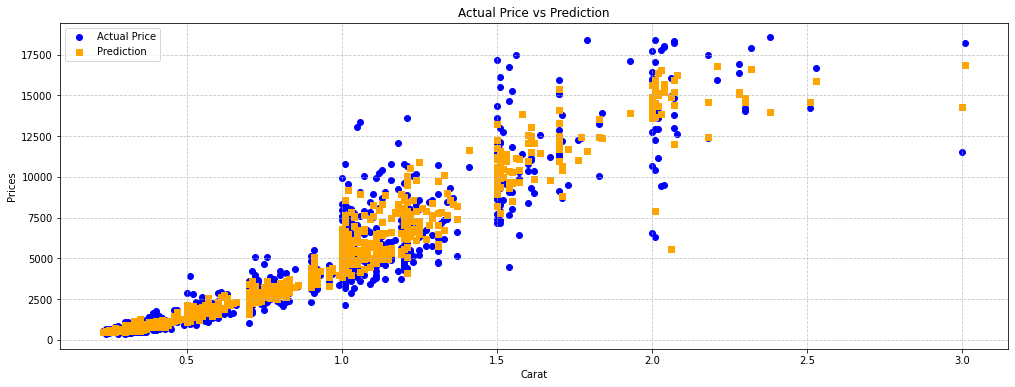

In [ ]:
plt.figure(figsize=(17, 6))
#
sample_predictions = predictions_df_all_features.orderBy(rand()).limit(1000)
#
plt.scatter(list(sample_predictions.toPandas()['carat']), list(sample_predictions.toPandas()['price']), label='Actual Price', color='blue', marker='o')
plt.scatter(list(sample_predictions.toPandas()['carat']), list(sample_predictions.toPandas()['prediction']), label='Prediction', color='orange', marker='s')
#
# Adding labels and title
plt.xlabel('Carat')
plt.ylabel('Prices')
plt.title('Actual Price vs Prediction')
#
# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
#
# Adding legend
plt.legend()
#
# Show plot
plt.show();

<p><b>8. Case of new data</b></p>
<p>How to predict newly arriving data if there is no information on it in Feature Store? Need to update first the Feature Store with new data:</p>

<p>Let's create a new diamond data. Schema should match data in Feature Store:</p>

In [ ]:
diamonds_full.printSchema()

root
 |-- index: long (nullable = true)
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: long (nullable = true)
 |-- x_r: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



In [ ]:
new_diamond = (diamonds_full.limit(1).withColumn('index',   lit(88887777).cast('long'))
                                     .withColumn('carat',   lit(2).cast('double'))
                                     .withColumn('cut',     lit('Good').cast('string'))
                                     .withColumn('color',   lit('E').cast('string'))
                                     .withColumn('clarity', lit('VS1').cast('string'))
                                     .withColumn('depth',   lit(40).cast('double'))
                                     .withColumn('table',   lit(64).cast('double'))
                                     .withColumn('x_r',     lit(4.14).cast('double'))
                                     .withColumn('y',       lit(3.5).cast('double'))
                                     .withColumn('z',       lit(2.1).cast('double')))
#
new_diamond_with_price = spark.createDataFrame(pd.DataFrame({'index': [88887777], 'price': [4500]}))
#
new_diamond_without_price = spark.createDataFrame(pd.DataFrame({'index': [88887777]}))
#
diamond_unknown = spark.createDataFrame(pd.DataFrame({'index': [98989898]}))
#
display(new_diamond)
display(new_diamond_with_price)
display(new_diamond_without_price)

index,carat,cut,color,clarity,depth,table,price,x_r,y,z
88887777,2.0,Good,E,VS1,40.0,64.0,326,4.14,3.5,2.1


index,price
88887777,4500


index
88887777


<p>Now, update the Feature Store with the new diamond data:</p>

In [ ]:
fs.write_table(name="diamonds_fs",
               df=new_diamond,
               mode='merge')

<p>We verify that <code>score_batch</code> predicts either with/without the price of the new data, the only requirement is the <b>primary key</b> - in this particular case, <b>column <code>index</code></b> - of the new diamond data in the Feature Store:</p>

In [ ]:
# predict with price
predictions_new_diamond_with_price = fs.score_batch(uri_all_features, new_diamond_with_price)
display(predictions_new_diamond_with_price)
#
# predict without price
predictions_new_diamond_without_price = fs.score_batch(uri_all_features, new_diamond_without_price)
display(predictions_new_diamond_without_price)

index,price,carat,depth,table,x_r,y,z,prediction
88887777,4500,2.0,40.0,64.0,4.14,3.5,2.1,9639.403333333334


index,carat,depth,table,x_r,y,z,prediction
88887777,2.0,40.0,64.0,4.14,3.5,2.1,9639.403333333334


<p>And verify that if a primary key is not found in the Feature Store, it results in an error:</p>

In [ ]:
# predict unknown diamond
predictions_unknown_diamond = fs.score_batch(uri_all_features, diamond_unknown)
display(predictions_unknown_diamond)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 431.0 failed 4 times, most recent failure: Lost task 0.3 in stage 431.0 (TID 1339) (10.139.64.4 executor driver): org.apache.spark.api.python.PythonException: 'ValueError: Input contains NaN, infinity or a value too large for dtype('float32').'. Full traceback below:
Traceback (most recent call last):
 File "/databricks/python/lib/python3.9/site-packages/mlflow/pyfunc/__init__.py", line 1025, in udf
 os.kill(scoring_server_proc.pid, signal.SIGTERM)
 File "/databricks/python/lib/python3.9/site-packages/mlflow/pyfunc/__init__.py", line 866, in _predict_row_batch
 result = predict_fn(pdf)
 File "/databricks/python/lib/python3.9/site-packages/mlflow/pyfunc/__init__.py", line 1006, in batch_predict_fn
 return loaded_model.predict(pdf)
 File "/databricks/python/lib/python3.9/site-packages/mlflow/pyfunc/__init__.py", line 373, in predict
 return self._predict_fn(data)
 File "/databricks/python/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 784, in predict
 X = self._validate_X_predict(X)
 File "/databricks/python/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 422, in _validate_X_predict
 return self.estimators_[0]._validate_X_predict(X, check_input=True)
 File "/databricks/python/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 407, in _validate_X_predict
 X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr",
 File "/databricks/python/lib/python3.9/site-packages/sklearn/base.py", line 421, in _validate_data
 X = check_array(X, **check_params)
 File "/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
 return f(*args, **kwargs)
 File "/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py", line 720, in check_array
 _assert_all_finite(array,
 File "/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py", line 103, in _assert_all_finite
 raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:694)
	at org.apache.spark.sql.execution.python.PythonArrowOutput$$anon$1.read(PythonArrowOutput.scala:110)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:647)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:761)
	at org.apache.spark.sql.execution.collect.UnsafeRowBatchUtils$.encodeUnsafeRows(UnsafeRowBatchUtils.scala:80)
	at org.apache.spark.sql.execution.collect.Collector.$anonfun$processFunc$1(Collector.scala:186)
	at org.apache.spark.scheduler.ResultTask.$anonfun$runTask$3(ResultTask.scala:75)
	at com.databricks.spark.util.ExecutorFrameProfiler$.record(ExecutorFrameProfiler.scala:110)
	at org.apache.spark.scheduler.ResultTask.$anonfun$runTask$1(ResultTask.scala:75)
	at com.databricks.spark.util.ExecutorFrameProfiler$.record(ExecutorFrameProfiler.scala:110)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:55)
	at org.apache.spark.scheduler.Task.doRunTask(Task.scala:174)
	at org.apache.spark.scheduler.Task.$anonfun$run$4(Task.scala:137)
	at com.databricks.unity.EmptyHandle$.runWithAndClose(UCSHandle.scala:125)
	at org.apache.spark.scheduler.Task.$anonfun$run$1(Task.scala:137)
	at com.databricks.spark.util.ExecutorFrameProfiler$.record(ExecutorFrameProfiler.scala:110)
	at org.apache.spark.scheduler.Task.run(Task.scala:96)
	at org.apache.spark.execu